# Описание
Этот ноутбук содержит решение первого домашнего задания "Оценки и доверительные интервалы"

## Результаты
1. Написана полностью
2. Написана полностью
3. Написана полностью
4. Написана полностью
5. Написана полностью
6. -

## Материалы:

* [Условие задач](mspsdz1.pdf)
* [Первая лекция](MSPS_2020_1.pdf)

# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

import scipy.stats as sps
from scipy.optimize import minimize

import matplotlib.pyplot as plt

# Решения

## Задача 1

- Выборка $X_1, X_2, \dots, X_n$:

$X_i\sim U(-\theta, \theta), \theta > 0$

- Плотность $X_i$:

$p(x) = \frac{1}{2\theta}I[-\theta, \theta](x)$

- Функция правдоподобия $\mathcal{L}_{X}(\theta)$:

$\mathcal{L}_{X}(\theta) = \prod\limits_{i=1}^{n}p(X_i) = \prod\limits_{i=1}^{n}\frac{2}{\theta}I[-\theta, \theta](X_i) = \frac{1}{(2\theta)^n}I[-\theta, \theta](X_{(1)})\cdot I[-\theta, \theta](X_{(n)})$

- Оценка $\widehat{\theta}$ параметра $\theta$, полученная при помощи метода максимального правдоподобия:

$\widehat{\theta} = \arg\max\limits_{\theta\in \mathbb{R}}\mathcal{L}_{x}(\theta) = \arg\max\limits_{\theta\in \mathbb{R}} \frac{1}{(2\theta)^n}I[-\theta, \theta](X_{(1)})\cdot I[-\theta, \theta](X_{(n)}) = \max(|X_{(1)}|, X_{(n)})$

- Упростим оценку, так как распределение $U(-\theta, \theta)$ – симметричное, то:

$|X_{(1)}| \stackrel{d}= |X_{(n)|} \stackrel{d}= \max(|X_{(1)}|, |X_{(n)}|) = \max(|X_{(1)}|, X_{(n)}) = \widehat{\theta}$  (*)

- **Определение:** $\widehat\theta$ – состоятельная оценка параметра $\theta$, если $\forall \theta \in \mathbb{R} ,\forall \varepsilon > 0:$ $P(|\widehat\theta - \theta| > \varepsilon) \xrightarrow[n\rightarrow\infty]{} 0$ 

- Проверка состоятельности $\widehat\theta$:

$P(|\widehat\theta - \theta| > \varepsilon) \stackrel{\text{(*)}}= P(||X_{(n)}| - \theta| > \varepsilon) \leq P(|X_{(n)} - \theta| > \varepsilon) \rightarrow \infty $ - так как $X_{(n)}$ состоятельная оценка $\theta$

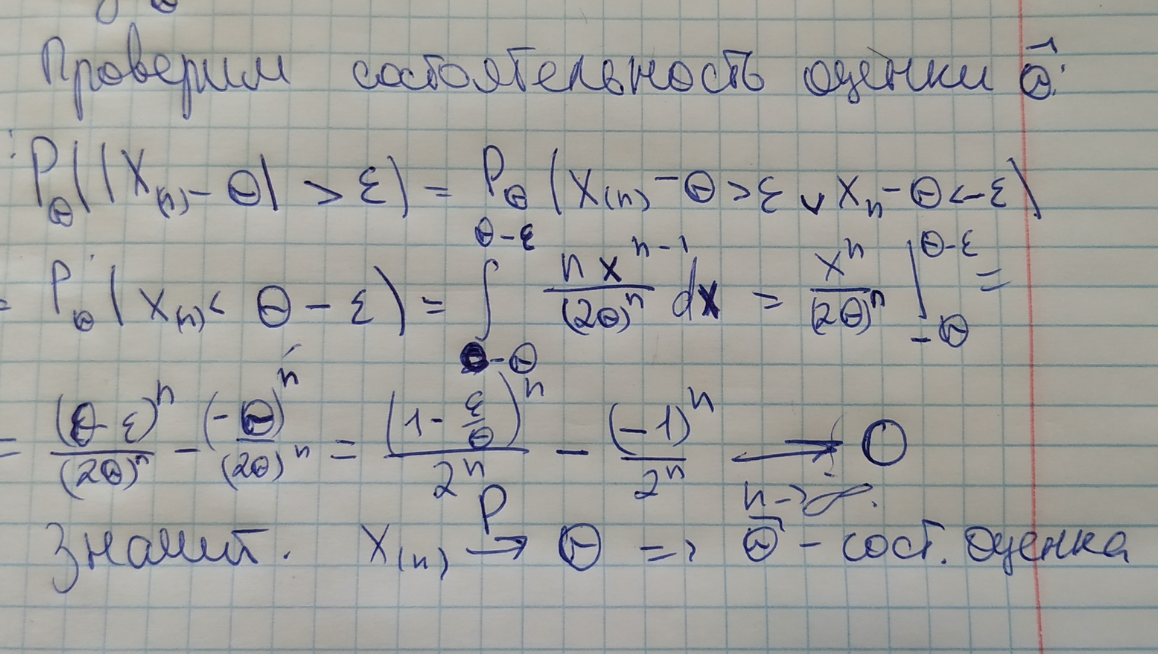

## Задача 2

Пусть функция случайная величина $X$ имеет плотность $f(x)$ и функцию распределения $F(x)$

Для начала поймём с какой вероятностью у нас принимается случайное значение $Y$:

$P(Y-\text{принято}) = \int\limits_{-\infty}^{\infty}P(Y-\text{принято}| Y=y)g(y)dy = \int\limits_{-\infty}^{\infty}\frac{f(y)}{cg(y)}g(y)dy = \frac{1}{c}$

Распишем вероятность того, что принятое значение $X$ меньше заданого $x$ (Таким образом посчитаем функцию распределения получившейся случайной велечины):

$P(Y \leq y | Y-\text{принято}) = \frac{P(Y-\text{принято}, Y \leq y)}{P(Y-\text{принято})} = c \int\limits_{-\infty}^{y}P(Y-\text{принято}|Y=t)g(t)dt=c\int\limits_{-\infty}^{y}\frac{f(t)}{cg(t)}g(t)dt = \int\limits_{-\infty}^{y}f(t)dt = F(y)$

Таким образом генерируемая случайная величина имеет функцию распределения, идентичную функции распределения $X$. Таким образом мы можем генерировать $X$

## Задача 3

Буду решать задачу на примере экспоненциального распределения $X_i \sim Exp(3)$:

- $\mathbb{E}(X_i) = \frac{1}{3}$
- $\mathbb{E}(X_i^2) = \frac{2}{3^2}$
- $D(X_i^2) = \frac{1}{3^2}$

In [2]:
N = 1000  # довольно большое число
LAMBDA = 3
MEAN = sps.expon.mean(scale=1/LAMBDA)
MEAN2 = sps.expon.moment(2, scale=1/LAMBDA)
VAR = sps.expon.var(scale=1/LAMBDA)

print('E(X)\t=', MEAN)
print('E(X^2)\t=', MEAN2)
print('D(X)\t=', VAR)

E(X)	= 0.3333333333333333
E(X^2)	= 0.2222222222222222
D(X)	= 0.1111111111111111


### Исследование одной выборки

* Сгенерируем бесконечную выборку $X$:

In [3]:
X = sps.expon.rvs(scale=1/LAMBDA, size=N)

* Посчитаем статистику $T_n$

In [4]:
def count_T(X):
    """ Count statistic T
        Params:
            X (np.array): shape is (batch_size, N) or (N, )
        Return:
            T (np.array): shape is (batch_size, N) or (N, )
    """
    need_flatten = False
    if len(X.shape) == 1:
        X = X.reshape((1, -1))
        need_flatten = True

    N = X.shape[1]
    seq = np.arange(1, N + 1)
    T = (np.cumsum(X, axis=1) - seq*MEAN) / np.sqrt(seq * VAR)
    return T.flatten() if need_flatten else T

In [5]:
T = count_T(X)

* Изобразим полученную статистику

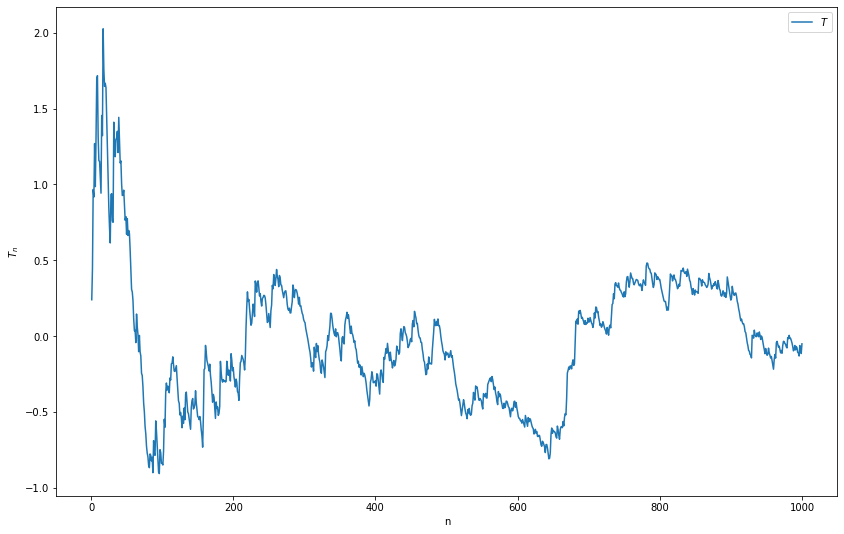

In [6]:
plt.figure(figsize=(14, 9 ))
plt.xlabel('n')
plt.ylabel(r'$T_n$')
plt.plot(np.arange(1, N+1), T, label=r'$T$')
plt.legend()
plt.show()

* Ответы на вопросы:

> Сходится ли $T_n$ на какой-нибудь реализации выборки $X$?

На изображенном выше графике сходится к 0

> Как вы это объясните?

Это связано с формулой построения $T_n$: мы сначала смещаем элементы так, чтобы их среднее было в нуле, а затем уменьшаем разброс (дисперсию)

### Исследуем на наборе выборок

* сгенерируем $k=1000$ выборок $X$

In [7]:
K = 1000

In [8]:
X = sps.expon.rvs(scale=1/LAMBDA, size=(K, N))

* Посчитаем статистики $T_{k, n}$

In [9]:
T = count_T(X)

* Изобразим все $k$ статистик на одном графике 

No handles with labels found to put in legend.
/Users/alex-kozinov/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


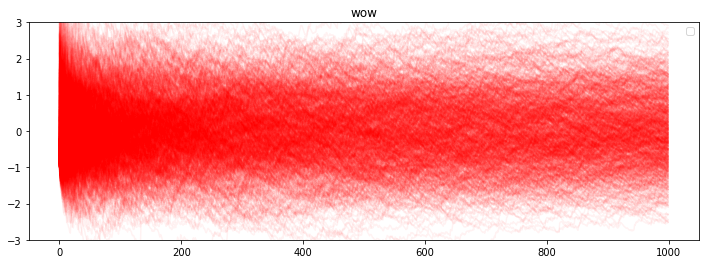

In [10]:
theoretical_value = 0
plt.figure(figsize=(12, 4))
plt.title('wow')
plt.ylim(theoretical_value-3, theoretical_value+3)

plt.plot(T.T, color='r', alpha=0.05)
plt.legend()
plt.show()

* Посмотрим на последнии значения статистик $T_{k,N}$ на гистограмме

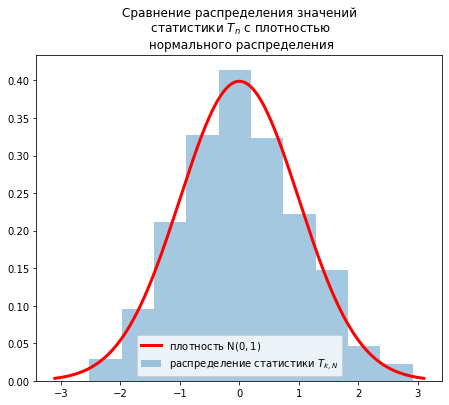

In [11]:
xmin, xmax = -3.1, 3.1
grid = np.linspace(xmin, xmax, 600)

plt.figure(figsize=(16, 6))
plt.xlim(xmin, xmax)
plt.subplot(1, 2, 1)
plt.hist(T[:, -1], bins=10, density=True, alpha=0.4, label=r'распределение статистики $T_{k,N}$')
plt.plot(grid, 
         sps.norm(0, 1).pdf(grid),
         color='red', lw=3, label='плотность $\mathsf{N}(0, 1)$')

plt.title('Сравнение распределения значений\n статистики $T_n$ с плотностью \n нормального распределения')
plt.legend()
plt.show()

* **Выводы:**

Первый график с множеством статистик имеет уплотнение вокруг нуля, что наталкивает на мысль, что статистика $T_n$ с ростом $n$ приобретает вид стандартного нормального распределения. Эта догадка подверждается после наблюдения за распределением последних значений статистики $T_n$ с плотностью нормального распределения. А так же центральной предельной теоремой :)

## Задача 4

- Выборка $X_1, X_2, \dots, X_{100}$:

$X_i\sim Pareto(\alpha, 1)$

- Плотность $X_i$:

$p(x)=\frac{\alpha}{x^{\alpha+1}}I(0, +\infty](x)$

- В этой задаче запишим логорифм функция правдоподобия $\mathcal{L}_{X}(\alpha)$:

$\mathcal{L}_{X}(\alpha) = \sum\limits_{i=1}^{n}\log p(X_i) = \sum\limits_{i=1}^{n}\ln \alpha - (\alpha + 1)\ln X_i + \ln I(0, +\infty](X_i) = n\ln\alpha-(\alpha+1)(\sum\limits_{i=1}^{n}\ln X_i)+\sum\limits_{i=1}^{n}\ln I(0, +\infty](X_i)$

- Оценка $\widehat{\alpha}$ параметра $\alpha$, полученная при помощи метода максимального правдоподобия:

$\widehat{\alpha} = \arg\max\limits_{\alpha\in \mathbb{R_+}}\mathcal{L}_{x}(\alpha) = \arg\max\limits_{\alpha\in \mathbb{R_+}} n\ln\alpha-(\alpha+1)(\sum\limits_{i=1}^{n}\ln X_i)$, считаем, что наша выборка корректна и все элементы $>0$

- Для нахождения максимума функции правдоподобия $\mathcal{L}_{X}(\alpha)$, найдём нули производной:

$\frac{\partial\mathcal{L}_{X}(\alpha)}{\partial\alpha} = \frac{n}{\alpha}-\sum\limits_{i=1}^{n}\ln X_i=0$

$\alpha=\frac{1}{\overline{\ln X}}$

* Полученная оценка $\widehat{\alpha}=\frac{1}{\overline{\ln X}}$ является а.н.о параметра $\alpha$

* Тогда при помощи замены асимптотической дисперсии на выборочную $S^2$ (при помощи леммы Слуцкого) получим доверительный интервал уровня $\gamma$:

$(\widehat{\alpha} - \frac{S}{\sqrt{n}}z_{{\frac{1-\gamma}{2}}}, \widehat{\alpha} + \frac{S}{\sqrt{n}}z_{{\frac{1-\gamma}{2}}})$, где $z_{\frac{1-\gamma}{2}}$ - $\frac{1-\gamma}{2}$ квантиль стандартного нормального распределения




In [12]:
def alpha_estimate(X):
    return 1.0 / np.mean(np.log(X))

def calculate_asymptotic_confidence_interval(sample, gamma=0.95):
    # Узнаём размер выборки
    n = sample.shape[0]
    
    # Считаем оценку альфы
    interval_center = alpha_estimate(X)

    # Считаем выборочную дисперсию
    S2 = np.mean(X ** 2) - np.mean(X)**2
    
    # Считаем радиус доверительного интервала
    indent = S2**0.5 * sps.norm().ppf((1 + gamma) / 2) / n**0.5
    
    left = interval_center - indent
    right = interval_center + indent
    
    return interval_center, left, right

* Для всех $\alpha \in (0, 5)$ построим по выборке $X_1, X_2, \dots, X_{100}$ доверительные интервалы уровня доверия $\gamma$

In [14]:
N = 100
alphas = np.linspace(0.1, 5, 50)

In [15]:
estimated_alphas = []
left_bounds = []
right_bounds = []

for alpha in alphas:
    X = sps.pareto(b=alpha).rvs(size=N)
    c, l, r = calculate_asymptotic_confidence_interval(X)
    estimated_alphas.append(c)
    left_bounds.append(l)
    right_bounds.append(r)

estimated_alphas = np.array(estimated_alphas)
left_bounds = np.array(left_bounds)
right_bounds = np.array(right_bounds)

* Изобразим полученные интервалы на графике

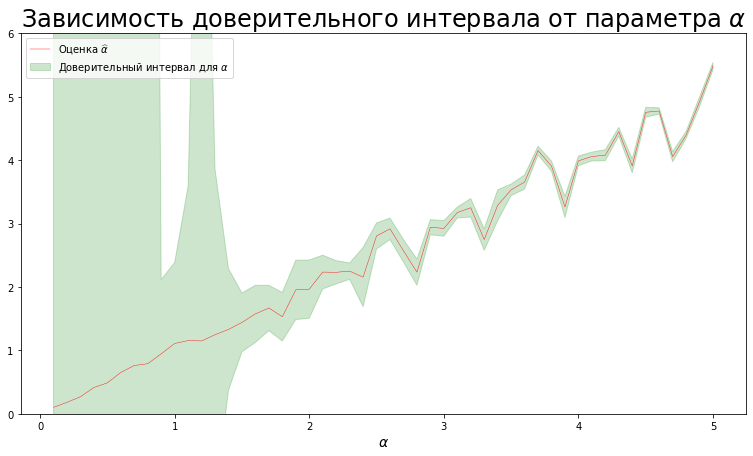

In [16]:
plt.figure(figsize=(13, 7))
plt.ylim((0, 6))
plt.title(r'Зависимость доверительного интервала от параметра $\alpha$', fontsize=24)
plt.xlabel(r"$\alpha$", fontsize=14)


plt.plot(alphas, estimated_alphas, color='r', linewidth=0.4,
         label=r'Оценка $\widehat\alpha$')

plt.fill_between(alphas, left_bounds, right_bounds, alpha=0.2, color='g', 
                 label=r'Доверительный интервал для $\alpha$')

plt.legend()
plt.show()

* **Выводы:**

1. Можно заметить, что доверительные интервалы сужаются. Это связано с уменьшением выборочной дисперсии

2. Так же зависимость $\widehat\alpha(\alpha)$ похожа на линейную, что подтверждает верность оценки 

3. От нуля до единицы доверительный интервал очень большой, так как у исследуемого распределения нет при таких параметрах мат. ожидания

## Задача 5

* Определим класс распределения Вейбулла с функцией распределения $F(x) = 1 - \exp(-(\beta x)^\alpha), x, \alpha, \beta>0$

In [17]:
class Weibull(sps.rv_continuous):
    def _cdf(self, x, alpha, beta):
        return (x > 0) * (1 - np.exp(-(beta * x)**alpha))

* Опищим функцию, реализующую метод максимального произведения спейсингов

In [18]:
def speising_method(X, distr_class, param_names, start_params):
    """ Метод работает при помощи минимизации минус логарифма среднего геометрического спейсингов
    """
    var_series = np.array(sorted(list(X)))
    left_quant = var_series[:-1]
    right_quant = var_series[1:]
    
    def H(params):
        """Минус логарифм среднего геометрического
        """
        params_dict = {name:val for name, val in zip(param_names, params)}
        params_dict['x'] = right_quant
        res = distr_class.cdf(**params_dict)
        
        params_dict['x'] = left_quant
        res -= distr_class.cdf(**params_dict)
        return -np.sum(np.log(res))
    
    finish_params = minimize(H, start_params, bounds=((1, None), (1, None)))
    return {name:val for name, val in zip(param_names, finish_params.x)}

* Попытаемся найти параметры, если $\alpha=10, \beta=20$

In [19]:
dist = Weibull()
X = dist.rvs(size=100, alpha=10, beta=20)
speising_method(X, dist, ['alpha', 'beta'], [1, 8])

{'alpha': 11.042496500480818, 'beta': 19.72196618628513}

* **Выводы:** Реализованный метод спейсингов вернул близкие к реальным значения параметров